Data Wrangling
Problem Statement: Data Wrangling on Real Estate Market
Dataset: "RealEstate_Prices.csv"
Description: The dataset contains information about housing prices in a specific real estate 
market. It includes various attributes such as property characteristics, location, sale prices, 
and other relevant features. The goal is to perform data wrangling to gain insights into the 
factors influencing housing prices and prepare the dataset for further analysis or modeling.
Tasks to Perform:
1. Import the "RealEstate_Prices.csv" dataset. Clean column names by removing spaces, 
special characters, or renaming them for clarity.
2. Handle missing values in the dataset, deciding on an appropriate strategy (e.g., 
imputation or removal).
3. Perform data merging if additional datasets with relevant information are available 
(e.g., neighborhood demographics or nearby amenities).
4. Filter and subset the data based on specific criteria, such as a particular time period, 
property type, or location.
5. Handle categorical variables by encoding them appropriately (e.g., one-hot encoding or 
label encoding) for further analysis.
6. Aggregate the data to calculate summary statistics or derived metrics such as average 
sale prices by neighborhood or property type.
7. Identify and handle outliers or extreme values in the data that may affect the analysis 
or modeling process.

First 5 rows of the dataset:
               area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

Shape of the dataset: (13320, 9)

Columns in the dataset: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

Unique values 

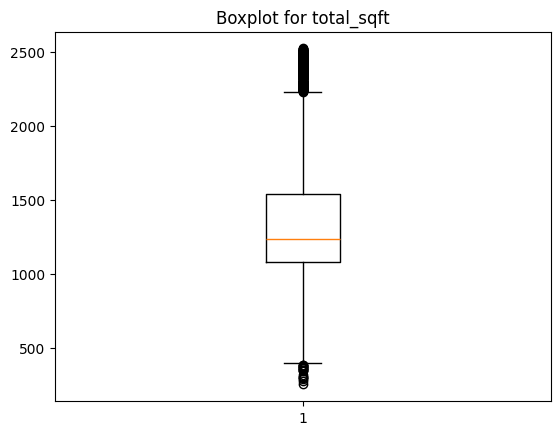

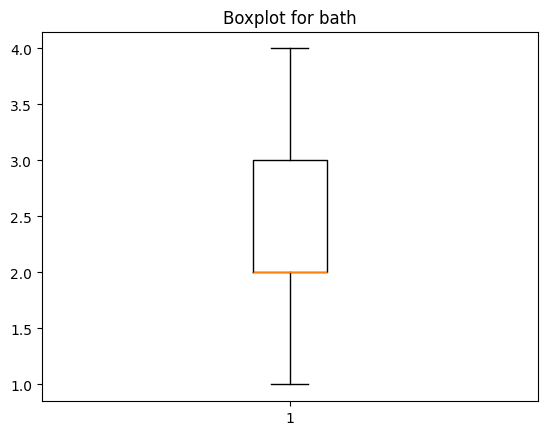

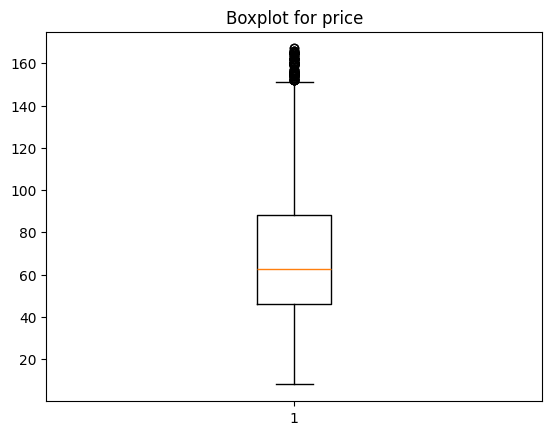

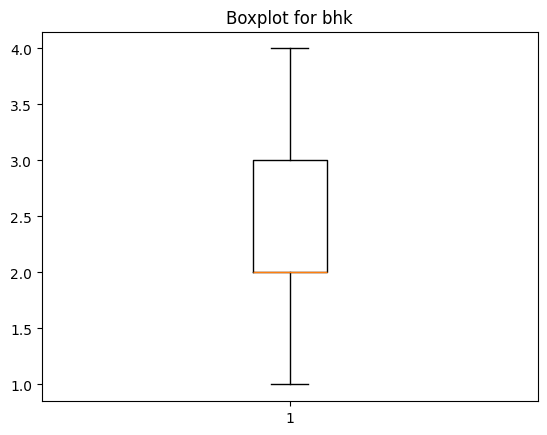

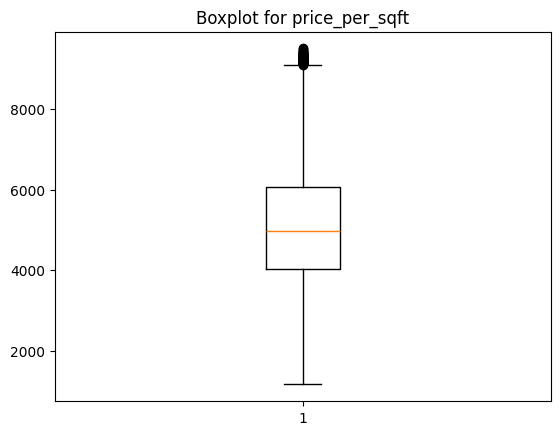


Shape after removing outliers: (10184, 7)

Features (X) sample:
                    location   size  total_sqft  bath  bhk  price_per_sqft
0  Electronic City Phase II  2 BHK      1056.0   2.0    2     3699.810606
2               Uttarahalli  3 BHK      1440.0   2.0    3     4305.555556
3        Lingadheeranahalli  3 BHK      1521.0   3.0    3     6245.890861

Target (y) sample:
 0    39.07
2    62.00
3    95.00
Name: price, dtype: float64

Length of target variable: 10184

Training set shape (X_train): (8147, 6)
Training target shape (y_train): (8147,)
Testing set shape (X_test): (2037, 6)
Testing target shape (y_test): (2037,)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings

# Suppressing update warnings for cleaner output
warnings.filterwarnings('ignore')

# Loading the dataset
df1 = pd.read_csv("Bengaluru_House_Data.csv")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", df1.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df1.shape)

# Display the column names
print("\nColumns in the dataset:", df1.columns)

# Display unique values in the 'area_type' column
print("\nUnique values in 'area_type':", df1['area_type'].unique())

# Display value counts for 'area_type'
print("\nValue counts for 'area_type':\n", df1['area_type'].value_counts())

# Dropping irrelevant columns
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
print("\nShape after dropping irrelevant columns:", df2.shape)

# Checking for missing values
print("\nMissing values in each column:\n", df2.isnull().sum())

# Dropping rows with missing values
df3 = df2.dropna()
print("\nMissing values after dropping NA rows:\n", df3.isnull().sum())
print("\nShape after dropping NA rows:", df3.shape)

# Display unique values in 'size' column and extract BHK number
print("\nUnique values in 'size' column:", df3['size'].unique())
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
print("\nExtracted BHK values:", df3.bhk.unique())

# Filtering for unusual BHK values
print("\nProperties with more than 20 BHK:\n", df3[df3.bhk > 20])

# Identifying non-numeric values in 'total_sqft' and handling ranges
def is_float(x):
    try:
        float(x)
        return True
    except (ValueError, TypeError):
        return False

print("\nNon-numeric 'total_sqft' values:\n", df3[~df3['total_sqft'].apply(is_float)].head(10))

# Function to convert 'total_sqft' with ranges or non-numeric values to numbers
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        try:
            return (float(tokens[0]) + float(tokens[1])) / 2
        except ValueError:
            return None
    try:
        return float(x)
    except ValueError:
        return None

# Applying conversion function to 'total_sqft'
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
print("\nData after converting 'total_sqft' values:\n", df4)

# Creating a price_per_sqft column
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
print("\nData with 'price_per_sqft' added:\n", df5.head())

# Saving cleaned data to a new CSV file
df5.to_csv("bhp.csv", index=False)

# Handling location by grouping less common locations as 'other'
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats_less_than_10 = location_stats[location_stats <= 10]
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print("\nData after grouping rare locations:\n", df5.head(10))

# Removing outliers for each feature using Interquartile Range (IQR)
def remove_outliers(df, column):
    Q1 = np.percentile(df[column], 25.)
    Q3 = np.percentile(df[column], 75.)
    IQR = Q3 - Q1
    ll = Q1 - (1.5 * IQR)
    ul = Q3 + (1.5 * IQR)
    upper_outliers = df[df[column] > ul].index.tolist()
    lower_outliers = df[df[column] < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    df.drop(bad_indices, inplace=True, errors='ignore')
    return df

# Remove outliers for total_sqft, bath, price, bhk, and price_per_sqft
columns_to_check = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
for col in columns_to_check:
    df6 = remove_outliers(df5, col)
    plt.boxplot(df6[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

print("\nShape after removing outliers:", df6.shape)

# Splitting data into features (X) and target (y)
X = df6.drop(['price'], axis='columns')
y = df6.price

print("\nFeatures (X) sample:\n", X.head(3))
print("\nTarget (y) sample:\n", y.head(3))
print("\nLength of target variable:", len(y))

# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print("\nTraining set shape (X_train):", X_train.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing target shape (y_test):", y_test.shape)
